In [4]:
import pandas as pd
from pandas import DataFrame
data = pd.read_csv('EnjoySport.csv')
columnLength= data.shape[1]
print (data.values)
h = ['0']*(columnLength-1)
hp=[]
hn=[]
for trainingExample in data.values:
    if trainingExample[-1]!='no':
        hp.append(list(trainingExample))
    else:
        hn.append(list(trainingExample))
for i in range (len(hp)):
    for j in range(columnLength-1):
        if (h[j]=='0'):
            h[j]=hp[i][j]
        if (h[j]!=hp[i][j]):
                h[j]='?'
        else:
                h[j]=hp[i][j]
print('\nThe positive Hypotheses are:',hp)
print('\nThe negative Hypotheses are:',hn)
print('\nThe Maximally Specific Hypothesis h is:',h)

[[0 'sunny' 'warm' 'normal' 'strong' 'warm' 'same' 'yes']
 [1 'sunny' 'warm' 'high' 'strong' 'warm' 'same' 'yes']
 [2 'rainy' 'cold' 'high' 'strong' 'warm' 'change' 'no']
 [3 'sunny' 'warm' 'high' 'strong' 'cool' 'change' 'yes']]

The positive Hypotheses are: [[0, 'sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], [1, 'sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'], [3, 'sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

The negative Hypotheses are: [[2, 'rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']]

The Maximally Specific Hypothesis h is: ['?', 'sunny', 'warm', '?', 'strong', '?', '?']


In [5]:
from pandas import DataFrame
data=pd.read_csv('EnjoySport.csv')
concepts=data.values[:,:-1]
target=data.values[:,-1]
def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [['?' for i in range(len(specific_h))] for i in range(len(specific_h))]
    for i, h in enumerate(concepts):
        if target[i] == "yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        if target[i] == "no":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
    indices = [i for i,val in enumerate(general_h) if val==['?' for i in range(len(specific_h))]]
    for i in indices:
        general_h.remove(['?' for i in range(len(specific_h))])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final S:", s_final)
print("Final G:", g_final)

Final S: ['?' 'sunny' 'warm' '?' 'strong' '?' '?']
Final G: [['?', 'sunny', '?', '?', '?', '?', '?'], ['?', '?', 'warm', '?', '?', '?', '?']]


In [2]:
import pandas as pd
def infoGain(P, N): #Calculate Information gain or Class entropy
    import math
    return -P / (P + N) * math.log2(P / ( P + N)) - N / (P + N) * math.log2(N / (P + N))
def insertNode(tree, addTo, Node):#tree is a dictionary, addTo is the position where to add the Node
    for k, v in tree.items(): #Traversal of tree
        if isinstance(v, dict): #first iteration returns false as tehre are no subtree for root
            tree[k] = insertNode(v, addTo, Node)
    if addTo in tree:    #If d is found then add Node
        if isinstance(tree[addTo], dict):#dict specifies what type of data is passed, here it is dictionary
            tree[addTo][Node] = 'None' #if instance is already present, create another instance
        else:
            tree[addTo] = {Node:'None'} #if no instance is present then create it.
    return tree
def insertConcept(tree, addTo, Node): #Same as insertNode but used to add Concept values
    for k, v in tree.items(): #Traversal of tree
        if isinstance(v, dict):
            tree[k] = insertConcept(v, addTo, Node)
    if addTo in tree:    #If d is found then add Node
        tree[addTo] = Node
    return tree
def getNextNode(data, AttributeList, concept, conceptVals, tree, addTo):
    Total = data.shape[0] #Return number of rows
    if Total == 0: #If Attibutes are empty, then return current value of tree
        return tree
    
    countC = {}
    for cVal in conceptVals:   #If Example is positive then return positive and If negative then return negative
        dataCC = data[data[concept] == cVal]   #Get data for specific concept
        countC[cVal] = dataCC.shape[0]         #Get the count of data for specific concept
#returns count of rows having yes in one iteration and count of rows having no in the second iteration
            
    if countC[conceptVals[0]] == 0: #If all examples are Positive(Not Negative), return single node Positive
        tree = insertConcept(tree, addTo, conceptVals[1])
        return tree
    
    if countC[conceptVals[1]] == 0: #If all examples are Negative (Not Positive), return single node Negative
        tree = insertConcept(tree, addTo, conceptVals[0])
        return tree
#if countC['Yes'] = 0 then insert 'No' in the tree at add to else if countC['No'] = 0 then insert 'Yes' in the tree at add to    
    ClassEntropy = infoGain(countC[conceptVals[1]],countC[conceptVals[0]]) #Calculate Class Entropy for data
    
    Attr = {}         #Attribute dict holding list of possible values
    for a in AttributeList:
        Attr[a] = list(set(data[a]))
        
    AttrCount = {}    #Get the attribute values being positive and negative
    EntropyAttr = {}  #Attribute Entropy
    for att in Attr:
        for vals in Attr [att]:
            for c in conceptVals:
                iData = data[data[att] == vals]       #Get data for specific attribute
                dataAtt = iData[iData[concept] == c]  #Get data for specific attribute and concept  
                AttrCount[c] = dataAtt.shape[0]  #Get the count of data for specific attribute and concept
            TotalInfo = AttrCount[conceptVals[1]] + AttrCount[conceptVals[0]] #Total Attribute 
            if AttrCount[conceptVals[1]] == 0 or AttrCount[conceptVals[0]] == 0:
                InfoGain=0
            else:
                InfoGain = infoGain(AttrCount[conceptVals[1]], AttrCount[conceptVals[0]]) #Calculate InfoGain for each  attr
            
            if att not in EntropyAttr:          #Calculate Entropy for each attr
                EntropyAttr[att] = ( TotalInfo / Total ) * InfoGain
            else:
                EntropyAttr[att] = EntropyAttr[att] + ( TotalInfo / Total ) * InfoGain
    
    Gain = {}
    for g in EntropyAttr:
        Gain[g] = ClassEntropy - EntropyAttr[g] #Calculate gain

    Node = max(Gain, key = Gain.get)               #Get root node

    tree = insertNode(tree, addTo, Node)
    for nD in Attr[Node]:
        tree = insertNode(tree, Node, nD)    #Insert Attribute value to tree
        newData = data[data[Node] == nD].drop(Node, axis = 1)#Get new data having Attribute of Node(nD) and removing rows with column Node
        AttributeList=list(newData)[:-1]   #New Attribute List
        tree = getNextNode(newData, AttributeList, concept, conceptVals, tree, nD) #Call the function recursively
    return tree
def main():
    from pandas import DataFrame 
    data = pd.read_csv('tennisdata.csv')    #Read CSV
    print(data)
    AttributeList = list(data)[:-1]            #Get Attribute List
    concept = str(list(data)[-1])              #Get concept list
    conceptVals = list(set(data[concept]))   #Get Concept values
    tree = getNextNode(data, AttributeList, concept, conceptVals, {'root':'None'},'root')
    print(tree)   #Call recursive function with initial value of tree and Node as root
main()

     Outlook Temperature Humidity  Windy PlayTennis
0      Sunny         Hot     High  False         No
1      Sunny         Hot     High   True         No
2   Overcast         Hot     High  False        Yes
3      Rainy        Mild     High  False        Yes
4      Rainy        Cool   Normal  False        Yes
5      Rainy        Cool   Normal   True         No
6   Overcast        Cool   Normal   True        Yes
7      Sunny        Mild     High  False         No
8      Sunny        Cool   Normal  False        Yes
9      Rainy        Mild   Normal  False        Yes
10     Sunny        Mild   Normal   True        Yes
11  Overcast        Mild     High   True        Yes
12  Overcast         Hot   Normal  False        Yes
13     Rainy        Mild     High   True         No
{'root': {'Outlook': {'Sunny': {'Humidity': {'Normal': 'Yes', 'High': 'No'}}, 'Overcast': 'Yes', 'Rainy': {'Windy': {False: 'Yes', True: 'No'}}}}}


In [5]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0)
y = y/100
def sigmoid (x):
    return 1/(1 + np.exp(-x))
def derivatives_sigmoid(x):
    return x * (1 - x)
epoch=7000
learning_rate=0.1
inputlayer_neurons = 2
hiddenlayer_neurons = 3
output_neurons = 1
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wo=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bo=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
    net_h=np.dot(X,wh) + bh
    sigma_h= sigmoid(net_h)
    net_o= np.dot(sigma_h,wo)+ bo
    output = sigmoid(net_o)
    deltaK = (y-output)* derivatives_sigmoid(output)
    deltaH = deltaK.dot(wo.T) * derivatives_sigmoid(sigma_h)
    wo = wo + sigma_h.T.dot(deltaK) *learning_rate
    wh = wh + X.T.dot(deltaH) *learning_rate
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89544059]
 [0.87861242]
 [0.89544677]]


In [4]:
import pandas as pd
def probAttr(data,attr,val):
    Total=data.shape[0]
    cnt = len(data[data[attr] == val])
    return cnt,cnt/Total
def train(data,Attr,conceptVals,concept):
    conceptProbs = {}
    countConcept={}
    for cVal in conceptVals:
        countConcept[cVal],conceptProbs[cVal] = probAttr(data,concept,cVal)
    AttrConcept = {}
    probability_list = {}
    for att in Attr: #Create a tree for attribute
        AttrConcept[att] = {}
        probability_list[att] = {}
        for val in Attr[att]:
            AttrConcept[att][val] = {}
            a,probability_list[att][val] = probAttr(data,att,val)
            for cVal in conceptVals:
                dataTemp = data[data[att]==val]
                AttrConcept[att][val][cVal] = len(dataTemp[dataTemp[concept] == cVal])/countConcept[cVal]
    print("P(A) : ",conceptProbs,"\n")
    print("P(X/A) : ",AttrConcept,"\n")
    print("P(X) : ",probability_list,"\n")
    return conceptProbs,AttrConcept,probability_list
def test(examples,Attr,concept_list,conceptProbs,AttrConcept,probability_list):
    misclassification_count=0
    Total = len(examples)
    for ex in examples:
        px={}
        for a in Attr:
            for x in ex:
                for c in concept_list:
                    if x in AttrConcept[a]:
                        if c not in px:
                            px[c] = conceptProbs[c]*AttrConcept[a][x][c]/probability_list[a][x]
                        else:
                            px[c] = px[c]*AttrConcept[a][x][c]/probability_list[a][x]
        print(px)
        classification = max(px,key=px.get)
        print("Classification :",classification,"Expected :",ex[-1])
        if(classification!=ex[-1]):
            misclassification_count+=1
    misclassification_rate=misclassification_count*100/Total
    accuracy=100-misclassification_rate
    print("Misclassification Count={}".format(misclassification_count))
    print("Misclassification Rate={}%".format(misclassification_rate))
    print("Accuracy={}%".format(accuracy))
def main():
    import pandas as pd
    from pandas import DataFrame
    data = pd.read_csv('PlayTennis_train1.csv')
    concept=str(list(data)[-1])
    concept_list = set(data[concept])
    Attr={}
    for a in list(data)[:-1]:
        Attr[a] = set(data[a])
    conceptProbs,AttrConcept,probability_list = train(data,Attr,concept_list,concept)
    examples = pd.read_csv('PlayTennis_test1.csv')
    test(examples.values,Attr,concept_list,conceptProbs,AttrConcept,probability_list)
main()

P(A) :  {'Yes': 0.6428571428571429, 'No': 0.35714285714285715} 

P(X/A) :  {'sl.no': {0: {'Yes': 0.0, 'No': 0.2}, 1: {'Yes': 0.0, 'No': 0.2}, 2: {'Yes': 0.1111111111111111, 'No': 0.0}, 3: {'Yes': 0.1111111111111111, 'No': 0.0}, 4: {'Yes': 0.1111111111111111, 'No': 0.0}, 5: {'Yes': 0.0, 'No': 0.2}, 6: {'Yes': 0.1111111111111111, 'No': 0.0}, 7: {'Yes': 0.0, 'No': 0.2}, 8: {'Yes': 0.1111111111111111, 'No': 0.0}, 9: {'Yes': 0.1111111111111111, 'No': 0.0}, 10: {'Yes': 0.1111111111111111, 'No': 0.0}, 11: {'Yes': 0.1111111111111111, 'No': 0.0}, 12: {'Yes': 0.1111111111111111, 'No': 0.0}, 13: {'Yes': 0.0, 'No': 0.2}}, 'Outlook': {'Overcast': {'Yes': 0.4444444444444444, 'No': 0.0}, 'Sunny': {'Yes': 0.2222222222222222, 'No': 0.6}, 'Rain': {'Yes': 0.3333333333333333, 'No': 0.4}}, 'Temperature': {'Mild': {'Yes': 0.4444444444444444, 'No': 0.4}, 'Hot': {'Yes': 0.2222222222222222, 'No': 0.4}, 'Cool': {'Yes': 0.3333333333333333, 'No': 0.2}}, 'Humidity': {'Normal': {'Yes': 0.6666666666666666, 'No': 0.2

In [2]:
import pandas as pd
msg = pd.read_csv('document.csv', names=['message', 'label'])
print("Total Instances of Dataset: ", msg.shape[0])
msg['labelnum'] = msg.label.map({'pos': 1, 'neg': 0})
X = msg.message
y = msg.labelnum
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
from sklearn.feature_extraction.text import CountVectorizer
count_v = CountVectorizer()
Xtrain_dm = count_v.fit_transform(Xtrain)
Xtest_dm = count_v.transform(Xtest)
df = pd.DataFrame(Xtrain_dm.toarray(),columns=count_v.get_feature_names())
print(df[0:5])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xtrain_dm, ytrain)
pred = clf.predict(Xtest_dm)
for doc, p in zip(Xtrain, pred):
    p = 'pos' if p == 1 else 'neg'
    print("%s -> %s" % (doc, p))
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
print('Accuracy Metrics: \n')
print('Accuracy: ', accuracy_score(ytest, pred))
print('Recall: ', recall_score(ytest, pred))
print('Precision: ', precision_score(ytest, pred))
print('Confusion Matrix: \n', confusion_matrix(ytest, pred))

Total Instances of Dataset:  18
   about  am  an  awesome  bad  beers  best  can  dance  deal  ...  tired  to  \
0      1   0   0        0    0      1     0    0      0     0  ...      0   0   
1      0   0   1        1    0      0     0    0      0     0  ...      0   0   
2      0   0   0        0    0      0     0    0      0     0  ...      0   0   
3      0   0   0        0    1      0     0    0      0     0  ...      0   1   
4      0   1   0        0    0      0     0    0      0     0  ...      1   0   

   tomorrow  very  view  we  what  will  with  work  
0         0     1     0   0     0     0     0     0  
1         0     0     0   0     0     0     0     0  
2         1     0     0   1     0     1     0     0  
3         0     0     0   0     0     0     0     0  
4         0     0     0   0     0     0     0     0  

[5 rows x 45 columns]
I feel very good about these beers -> pos
This is an awesome place -> pos
We will have good fun tomorrow -> pos
That is a bad locality

C:\Users\suman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'GMM Classification')

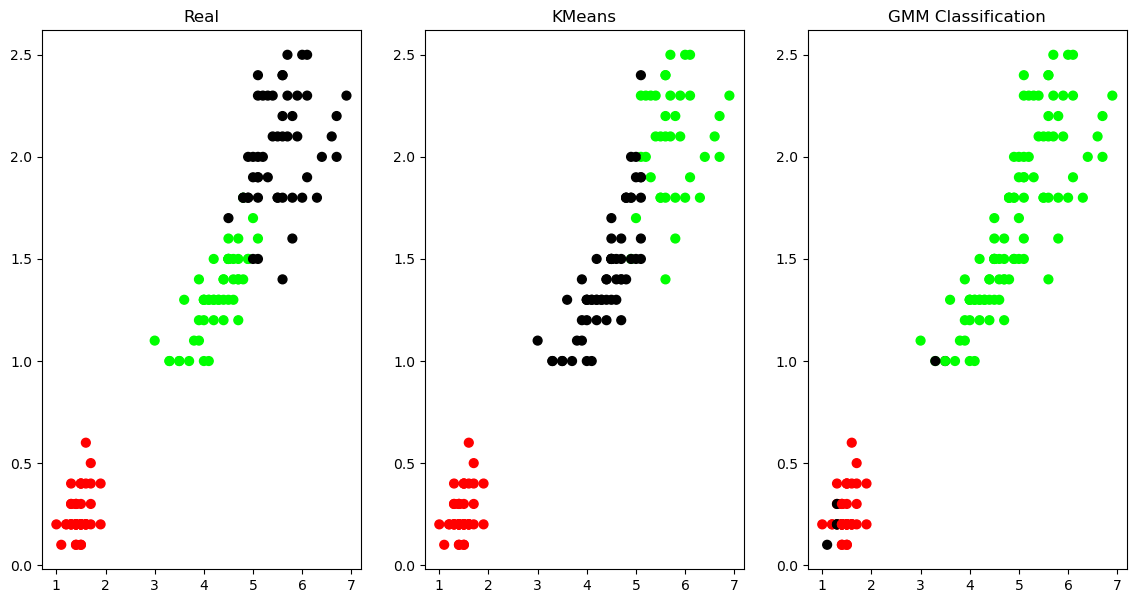

In [2]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=load_iris()
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
#REAL PLOT
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real')
#KMeans -PLOT
plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('KMeans')
#GMM PLOT
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')

In [5]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
dataset=load_iris()
X_train,X_test,y_train,y_test=train_test_split(dataset["data"],dataset["target"],random_state=0)
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
for i in range(len(X_test)):
    x=X_test[i]
    x_new=np.array([x])
prediction=clf.predict(x_new)
print("TARGET=",y_test[i],dataset["target_names"][y_test[i]],"PREDICTED=",prediction,dataset["target_names"][prediction])
print(clf.score(X_test,y_test))

TARGET= 1 versicolor PREDICTED= [2] ['virginica']
0.9736842105263158


C:\Users\suman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\suman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

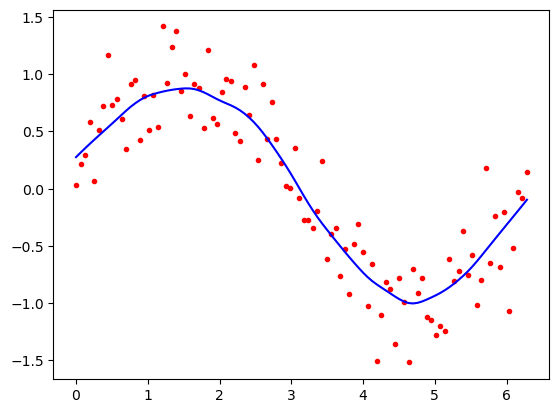

In [6]:
from math import ceil
import numpy as np
from scipy import linalg
def lowess(x, y, f, iterations):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],[np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]
        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2
    return yest
def main():
    import math
    n = 100
    x = np.linspace(0, 2 * math.pi, n)
    y = np.sin(x) + 0.3 * np.random.randn(n)
    f =0.25
    iterations=3
    yest = lowess(x, y, f, iterations)
    import matplotlib.pyplot as plt
    plt.plot(x,y,"r.")
    plt.plot(x,yest,"b-")
main()